<a href="https://colab.research.google.com/github/lionheart7dec/My_files/blob/master/Credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files 
uploaded = files.upload()

Saving creditcard.csv to creditcard.csv


In [0]:
# Importing the necessary  packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
# Loading the data from the csv file using pandas

df= pd.read_csv('creditcard.csv')

In [5]:
# Exploring the dataset

print (df.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [6]:
df.shape

(284807, 31)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [8]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


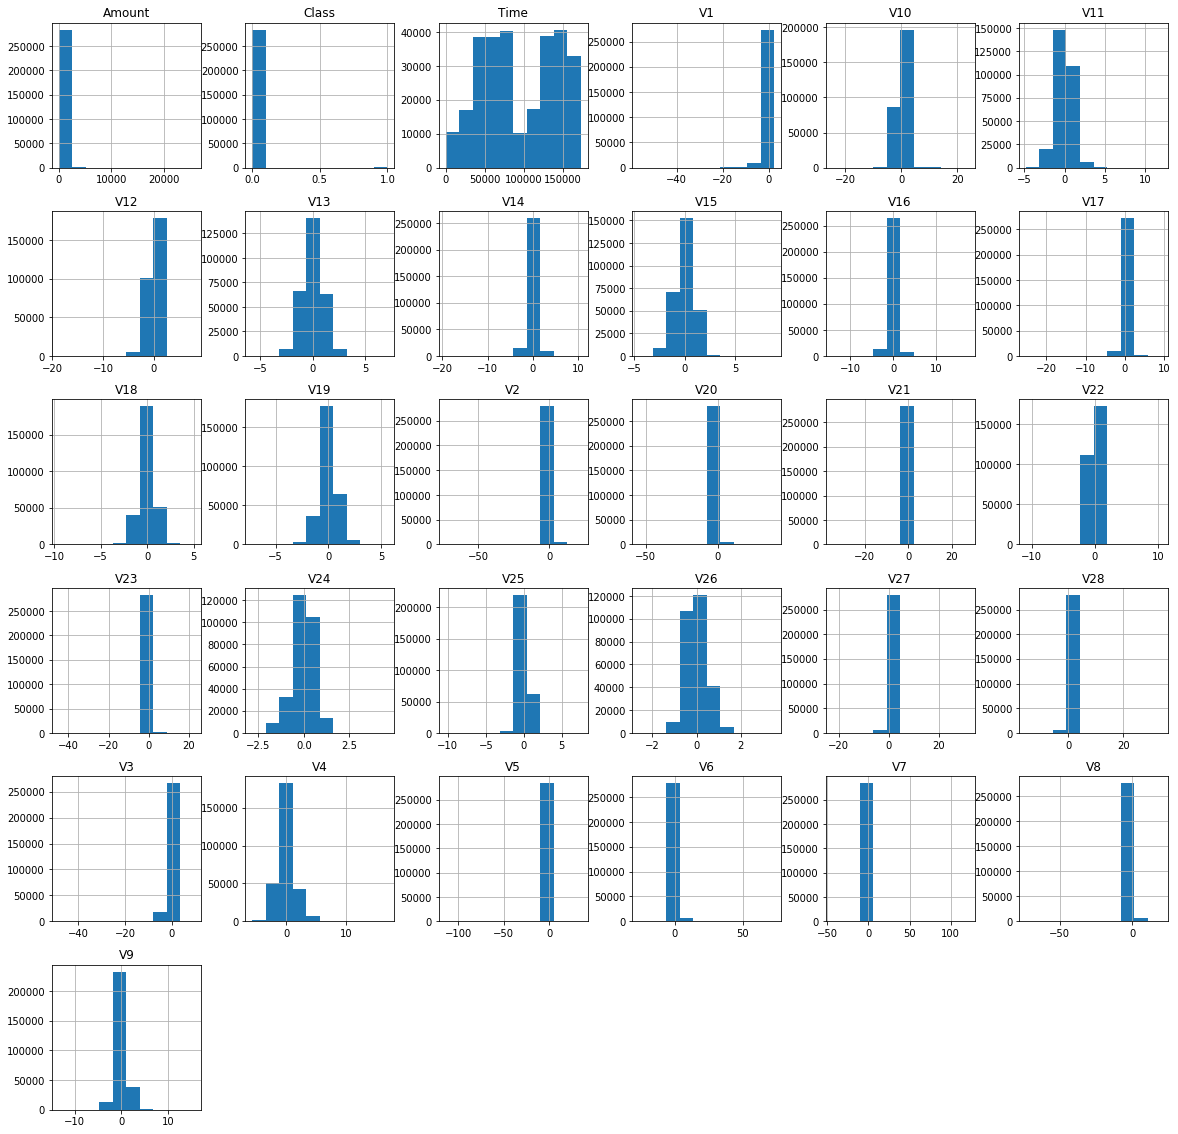

In [9]:
# Plotting histogram of each parameter 

df.hist(figsize=(20,20))
plt.show()

In [0]:
non_fraud = df[df['Class']==0]

In [11]:
#Determining number of fraud cases in the dataset
fraud = df[df['Class']==1]
             
valid = df[df['Class']==0]
                  

outlier_fraction = len(fraud)/float(len(valid))                
outlier_fraction
              
print ('Fraud cases: {}'.format(len(fraud)))   
print ('Valid cases: {}'.format(len(valid)))

Fraud cases: 492
Valid cases: 284315


<function matplotlib.pyplot.show>

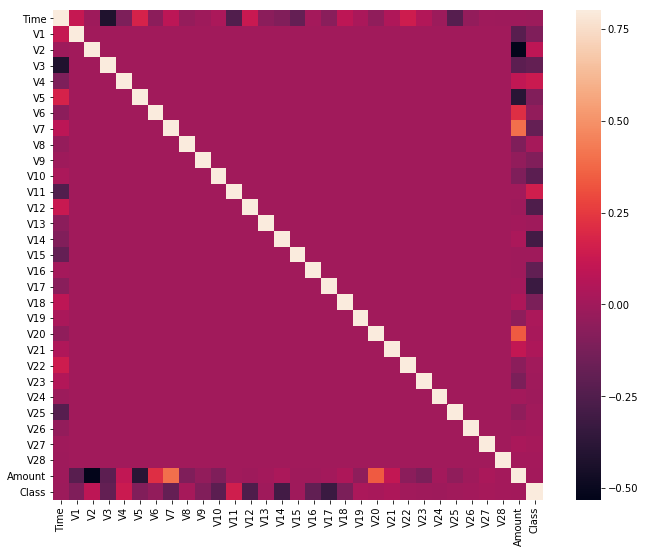

In [12]:
# Correlation matrix

corrmat= df.corr()
fig= plt.figure(figsize=(12,9))

sns.heatmap(corrmat, vmax=.8, square= True)
plt.show

In [13]:
print(' Fraud Transaction % = ', (len(fraud)/len(df))* 100, '%')

 Fraud Transaction % =  0.1727485630620034 %


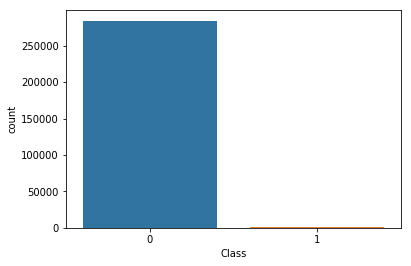

In [14]:
sns.countplot(df['Class'], Label= "Count")

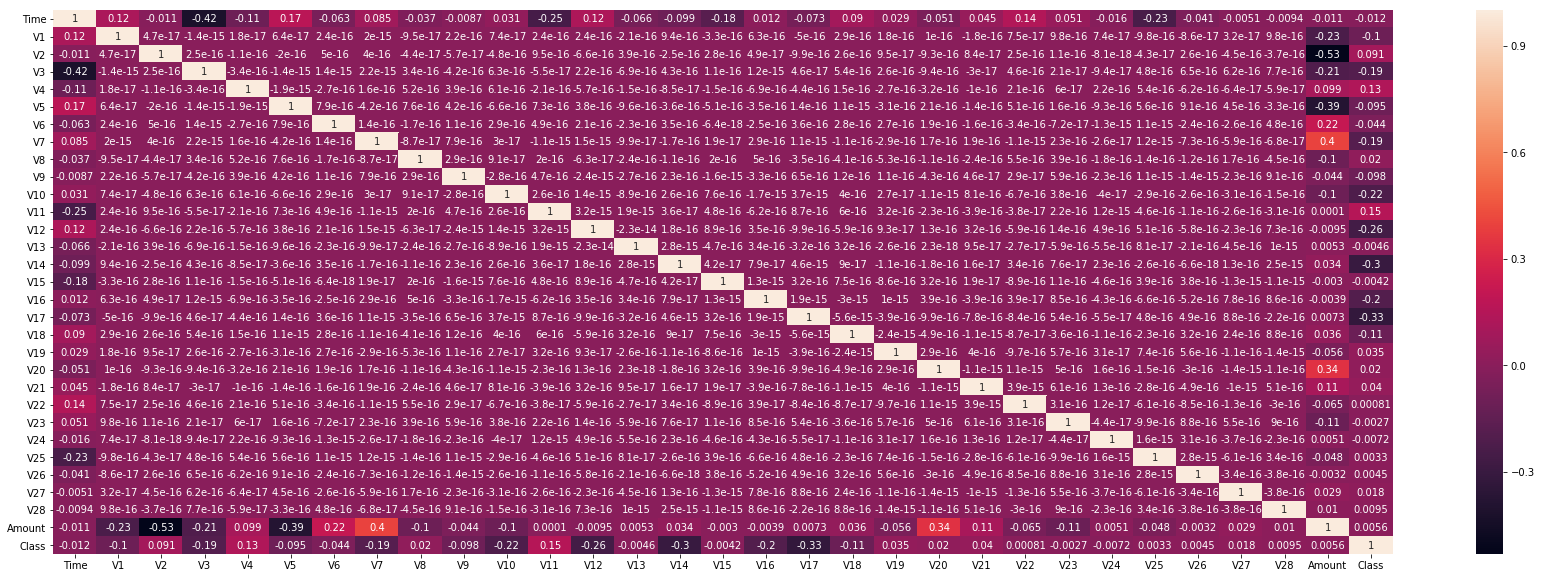

In [15]:
plt.figure (figsize =(30,10))

sns.heatmap(df.corr(), annot = True)

In [0]:
column_headers = df.columns.values

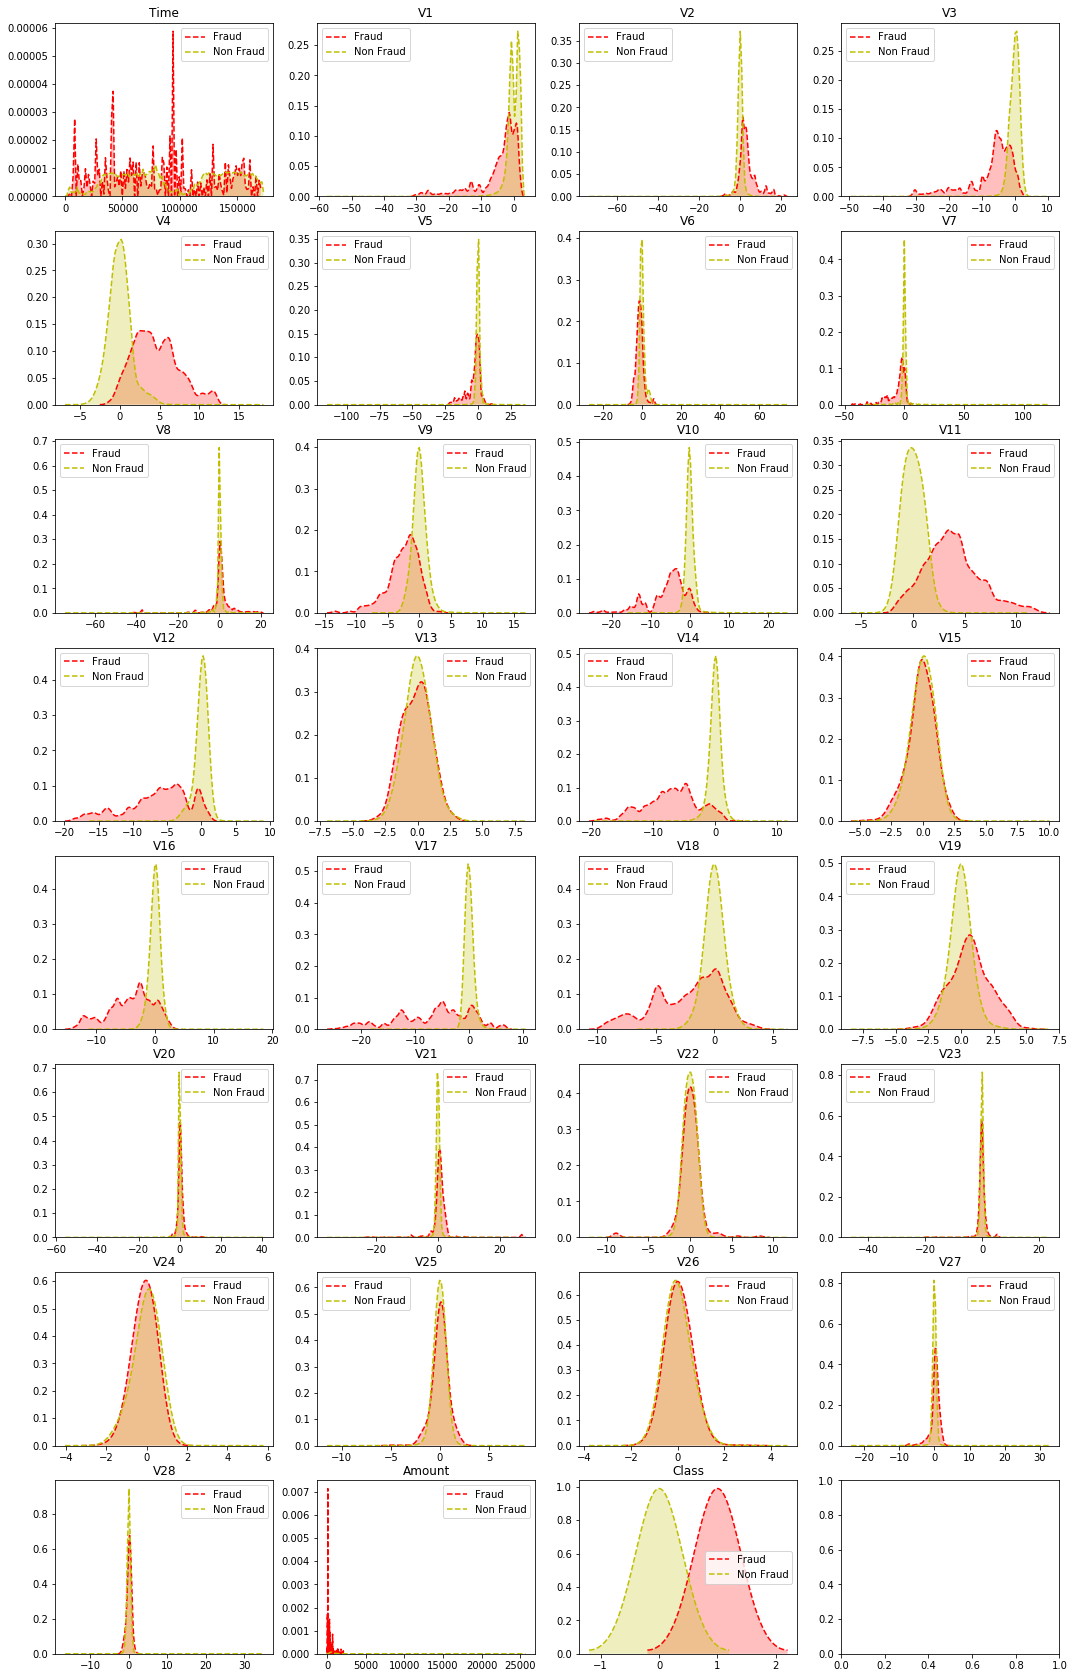

In [17]:
# Kernal density estimation (KDE) is a non- parametric way to estimate the probaility density function

i=1

fig, ax = plt.subplots(8,4, figsize =(18,30))
for column_header in column_headers:
  plt.subplot(8,4,i)
  sns.kdeplot(fraud[column_header], bw =0.4, label = "Fraud", shade = True, color='r', ls='--')
  sns.kdeplot(non_fraud[column_header], bw =0.4, label = "Non Fraud", shade = True, color='y', ls='--')
  plt.title(column_header, fontsize=12)
  i=i+1
plt.show();

All the features are mean centered except 'Time' lets look at it more closely


Seems like less trasaction during night time
Any how, variable does not look very important, will drop it.
----------------------------------------------------------------------


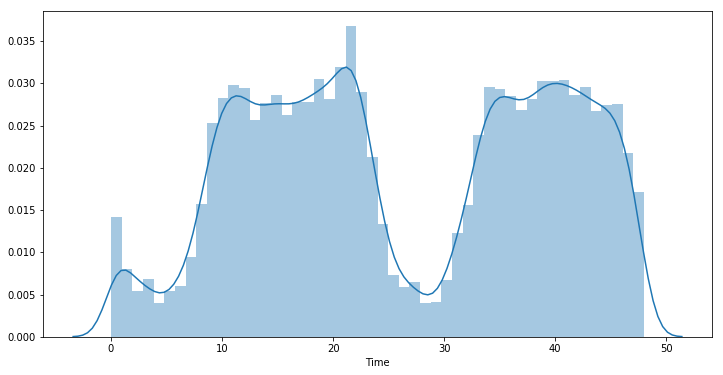

In [18]:
# Distribution plot of Time variable
plt.figure(figsize=(12,6))
sns.distplot(df['Time']/60/60)
print('Seems like less trasaction during night time')
print('Any how, variable does not look very important, will drop it.')
print('-'*70)

In [0]:
df = df.drop('Time',axis=1)

In [0]:
# Feature Scale/ Normalize the 'Amount' column 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(np.array(df['Amount']).reshape(-1,1))

In [21]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


No major correlation between any variable, few seem to  have with amount and class
----------------------------------------------------------------------


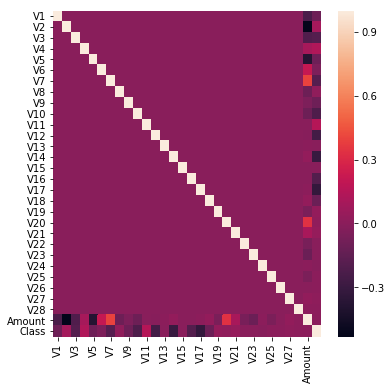

In [22]:
# Correlation Matrix
print('No major correlation between any variable, few seem to  have with amount and class')
print('-'*70)
plt.figure(figsize=(6,6))
sns.heatmap(df.corr())

In [23]:
# Correlation Matrix for Amount and Class
print("No Major Correlation here also")
print('-'*40)
df.corr()[['Amount','Class']]

No Major Correlation here also
----------------------------------------


,Amount,Class
V1,-0.227709,-0.101347
V2,-0.531409,0.091289
V3,-0.210880,-0.192961
V4,0.098732,0.133447
V5,-0.386356,-0.094974
V6,0.215981,-0.043643
V7,0.397311,-0.187257
V8,-0.103079,0.019875
V9,-0.044246,-0.097733
V10,-0.101502,-0.216883


In [0]:
# Under Sampling Data for Model building
X1 = df[df['Class'] == 1]
X2 = df[df['Class'] == 0].sample(492)
X = pd.concat([X1,X2],axis=0)
X = X.sample(frac=1).reset_index(drop=True)
y = X['Class']
X = X.drop('Class',axis=1)

We are taking 492 available samples of 'Class 1' and joining them with random 492 'Class 0' rows to create a balanced data set for modelling our classifier.


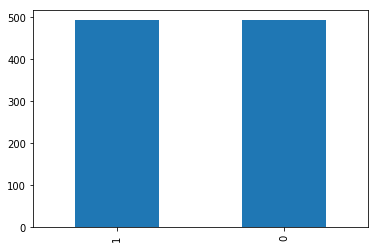

In [25]:
y.value_counts().plot.bar()

In [0]:
# Import Important Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

In [27]:
# Lets Seperate Training And Testing Data for our sample dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4)
print('Training Data Size : ',X_train.shape)
print('Testing Data Size : ',X_test.shape)
print('Training Data Class Size : ',y_train.shape)
print('Testing Data Class Size : ',y_test.shape)

Training Data Size :  (590, 29)
Testing Data Size :  (394, 29)
Training Data Class Size :  (590,)
Testing Data Class Size :  (394,)


In [0]:
def modeller(X,y,model):
    model.fit(X,y)
    return model

In [0]:
def scorer(X,y,model):
    pred = model.predict(X)
    acc = round(accuracy_score(y,pred),4)
    recc = round(recall_score(y,pred),4)
    return (acc,recc)

In [30]:
# Lets build models for Logistic Regression, Neural Network and Support Vector Machine Models
lr = modeller(X_train,y_train,LogisticRegression(solver='lbfgs',))
mlp = modeller(X_train,y_train,MLPClassifier())
svm =  modeller(X_train,y_train,SVC(gamma='auto',probability=True))

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [31]:
print('Model Name \t\t| Accuracy \t| Recall Acuracy')
print('-'*50)
acc,recc = scorer(X_test,y_test,lr)
print('Logistic Regression \t| {} \t| {}'.format(acc,recc))
acc,recc = scorer(X_test,y_test,mlp)
print('Neural Network \t\t| {} \t| {}'.format(acc,recc))
acc,recc = scorer(X_test,y_test,svm)
print('Support Vector Machine \t| {} \t| {}'.format(acc,recc))
print('-'*50)

Model Name 		| Accuracy 	| Recall Acuracy
--------------------------------------------------
Logistic Regression 	| 0.9239 	| 0.9278
Neural Network 		| 0.934 	| 0.933
Support Vector Machine 	| 0.9188 	| 0.9175
--------------------------------------------------


We can see Logistic gives best accuracy and recall score, but as the score is close, lets look at ROC curve for both





In [0]:
def roc_scorer(X,y,model):
    preds = model.predict_proba(X)[:,1]
    fpr,tpr,_ = roc_curve(y,preds)
    roc_auc = round(auc(fpr,tpr),6)
    return (fpr,tpr,roc_auc)

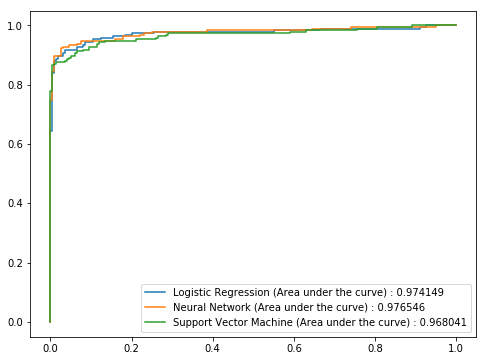

In [33]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
fpr,tpr,roc_auc = roc_scorer(X_test,y_test,lr)
ax.plot(fpr,tpr,label='Logistic Regression (Area under the curve) : {}'.format(roc_auc))
fpr,tpr,roc_auc = roc_scorer(X_test,y_test,mlp)
ax.plot(fpr,tpr,label='Neural Network (Area under the curve) : {}'.format(roc_auc))
fpr,tpr,roc_auc = roc_scorer(X_test,y_test,svm)
ax.plot(fpr,tpr,label='Support Vector Machine (Area under the curve) : {}'.format(roc_auc))
plt.legend(loc=4)

We can see that even though Neural Network is not the best model when using recall or accuracy score to decide, it stands out when using Area Under the Curve

In [0]:
# Lets use the Neural Network Model on our full data set

In [35]:
# Setup full data for predictions
df_y = df['Class']
df_X  = df.drop('Class',axis=1)
df_X.shape

(284807, 29)

In [36]:
# Lets use the model we fit on our balanced data set to predict full data
mlp = modeller(X_train,y_train,MLPClassifier())
print('Model Name \t\t| Accuracy \t| Recall Acuracy')
print('-'*50)
acc,recc = scorer(df_X,df_y,mlp)
print('Neural Network \t\t| {} \t| {}'.format(acc,recc))
print('-'*50)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Model Name 		| Accuracy 	| Recall Acuracy
--------------------------------------------------
Neural Network 		| 0.9582 	| 0.9675
--------------------------------------------------


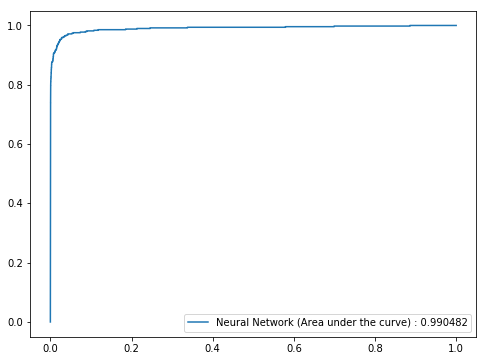

In [37]:
# Let get the ROC curve on the the full data set
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
fpr,tpr,roc_auc = roc_scorer(df_X,df_y,mlp)
ax.plot(fpr,tpr,label='Neural Network (Area under the curve) : {}'.format(roc_auc))
plt.legend(loc=4)

We are getting 0.99 value for AUC

Text(33.0, 0.5, 'True Class')

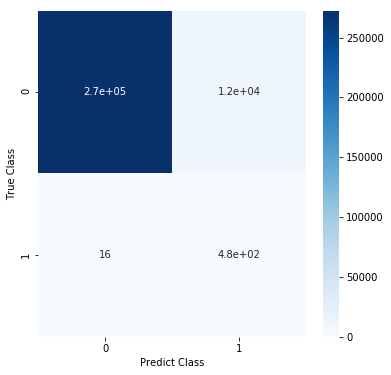

In [38]:
# Confusion Matrix
fig = plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(df_y,mlp.predict(df_X)),annot=True,cmap='Blues')
plt.xlabel('Predict Class')
plt.ylabel('True Class')

We can see that the model is predicting around 477 frauds correctly, out of total 492 frauds. This is a good prediction, given that we have just used simple neural network and not used any Deep Learning models